In [1]:
from tqdm import tqdm
import datetime
tqdm.pandas()
import os 
import sys
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
#connect local PATH
p = os.path.abspath(r'C:\Users\Ben\Desktop\Diplomatiki')
sys.path.append(str(p))
from CryptoSent.tools.crypto_coin_actual import get_btc_actual_hourly
from CryptoSent.tools import evaluation as eval
from CryptoSent.tools.utils import load_submissions
df=load_submissions()



def get_emotion_key(x,key):
    try:
        if math.isnan(x): return 0
    except:
        if isinstance(x[0],list): return float(x[0][key]['score'])


emotions=['dbe_sadness','dbe_joy','dbe_love','dbe_anger','dbe_fear','dbe_surprise']
for i,emotion in enumerate(emotions):
    df[emotion] = df.sent_dbe.progress_apply(lambda x:  get_emotion_key(x,i))

scaler=MinMaxScaler()
for emotion in emotions:
    df[emotion+'_t']=(scaler.fit_transform(df[[emotion]]).reshape(1, -1)[0])


100%|██████████| 1559351/1559351 [00:01<00:00, 829739.45it/s]


In [1]:
#run from here

<AxesSubplot:xlabel='created'>

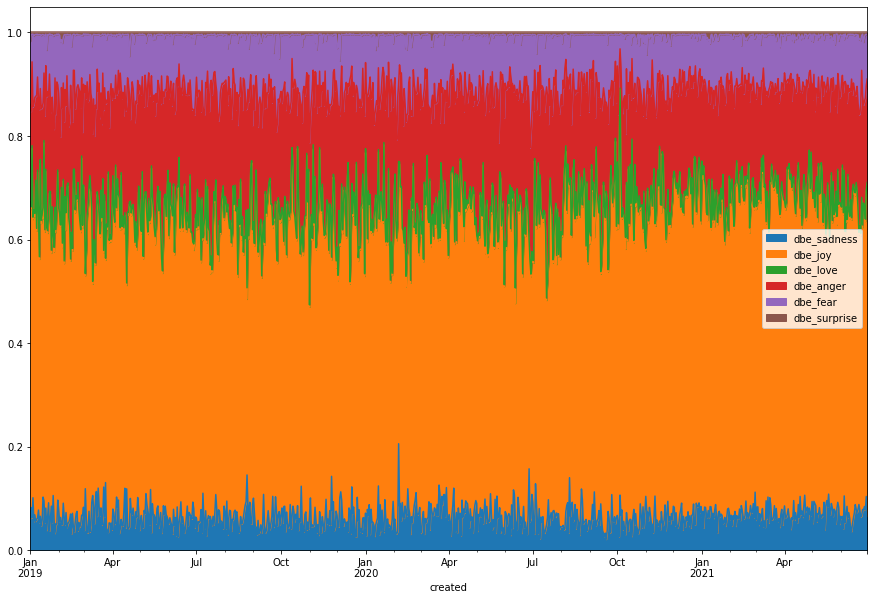

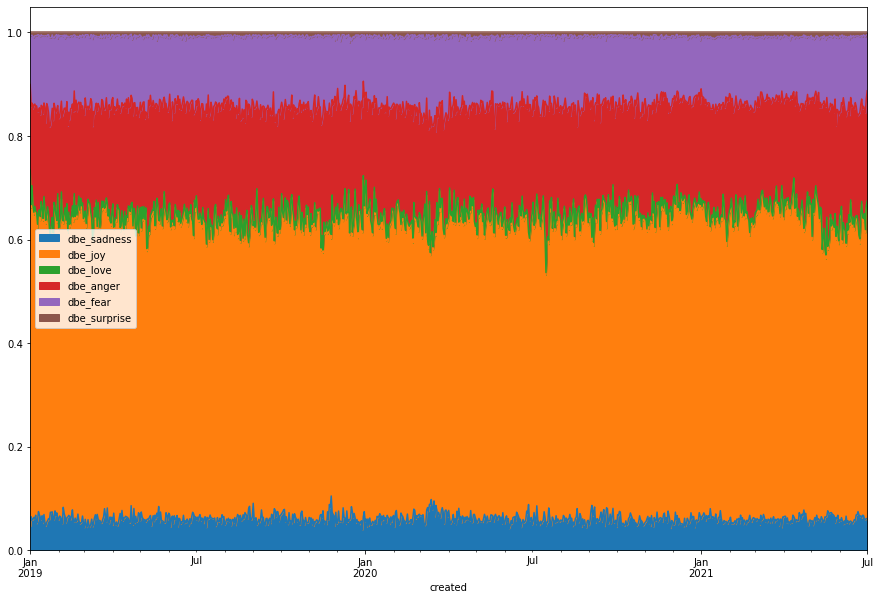

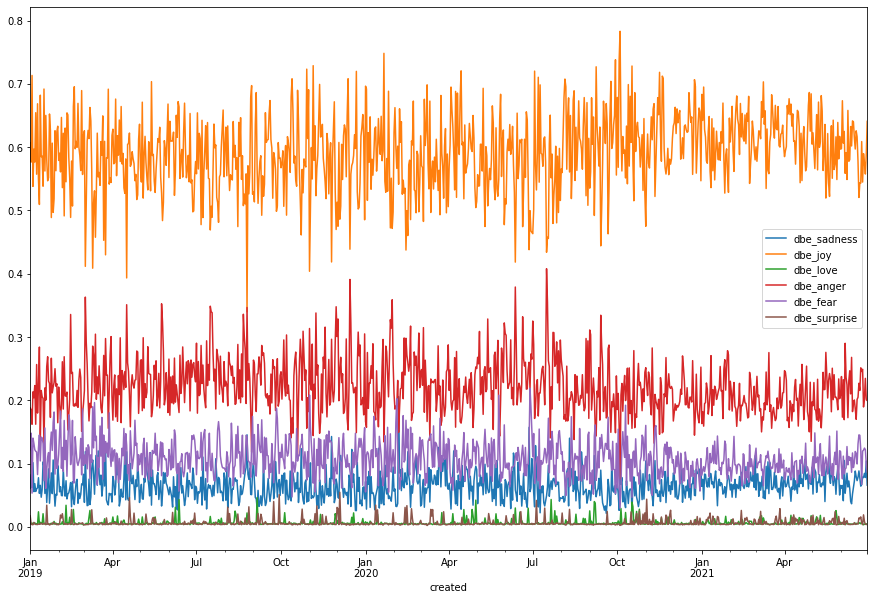

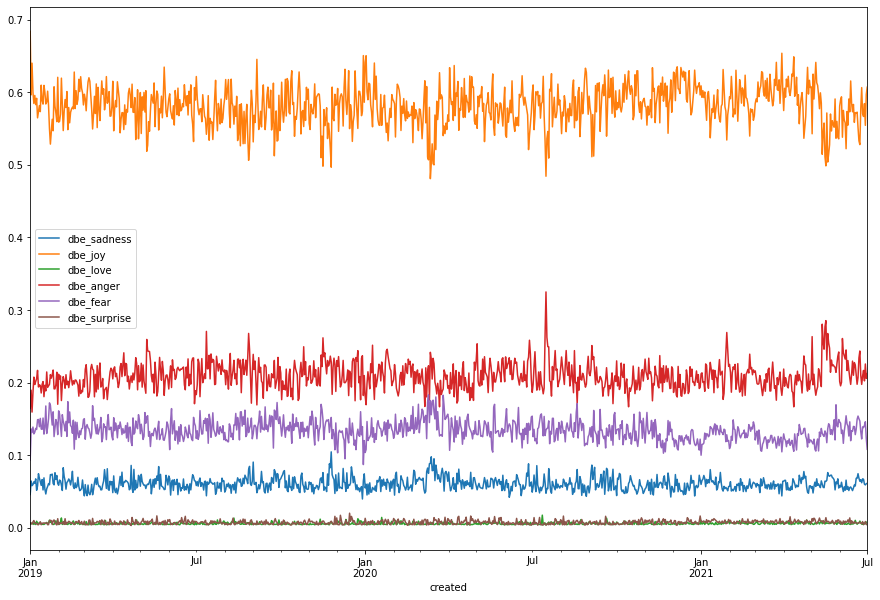

In [2]:
df[(df.origin!='main')&(df.dbe_joy!=0)][emotions].resample('d').mean().plot.area(figsize=(15,10))
df[(df.origin=='main')&(df.dbe_joy!=0)][emotions].resample('d').mean().plot.area(figsize=(15,10))

df[(df.origin!='main')&(df.dbe_joy!=0)][emotions].resample('d').mean().plot(figsize=(15,10))
df[(df.origin=='main')&(df.dbe_joy!=0)][emotions].resample('d').mean().plot(figsize=(15,10))

<AxesSubplot:xlabel='created'>

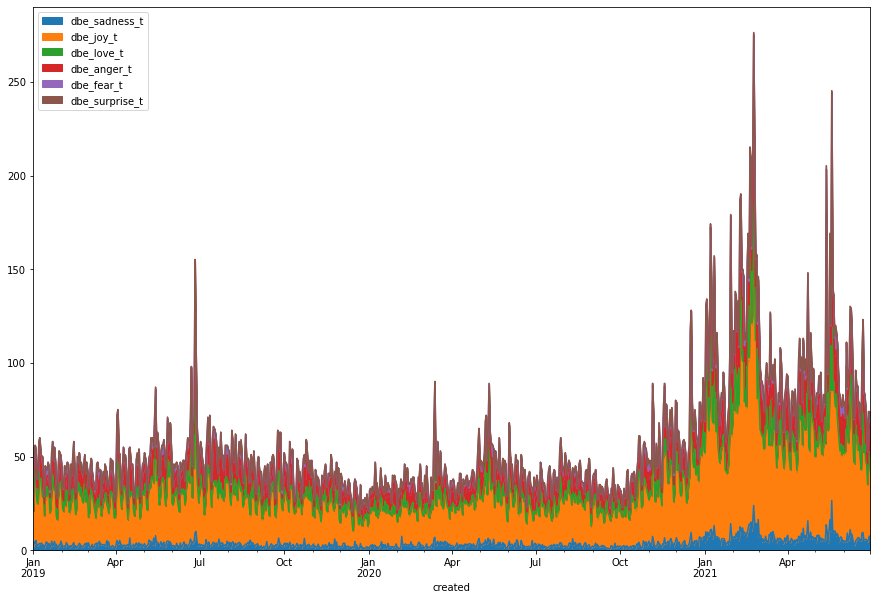

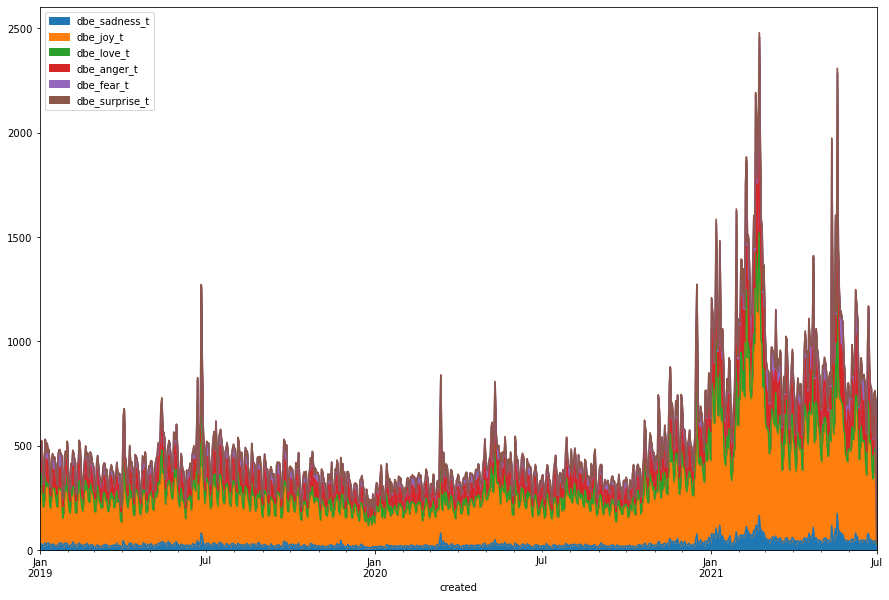

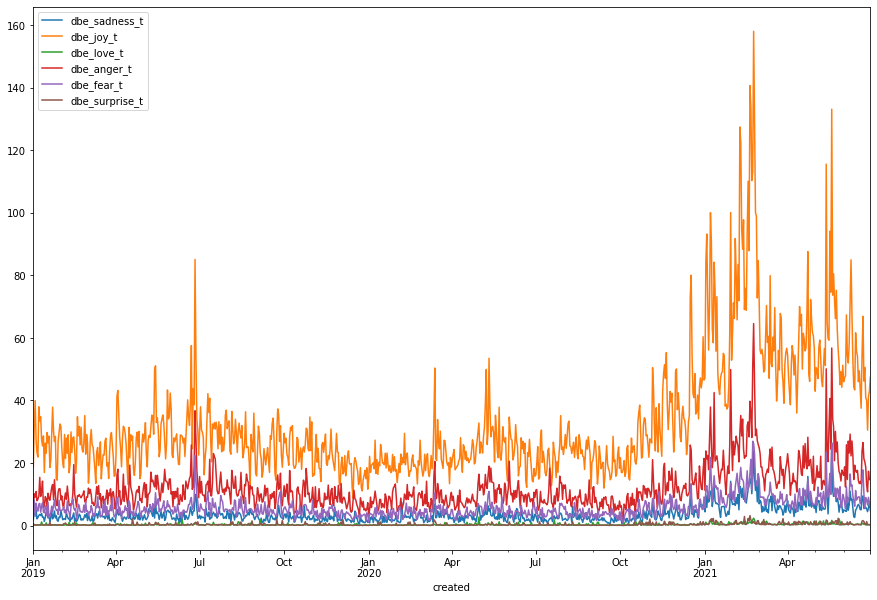

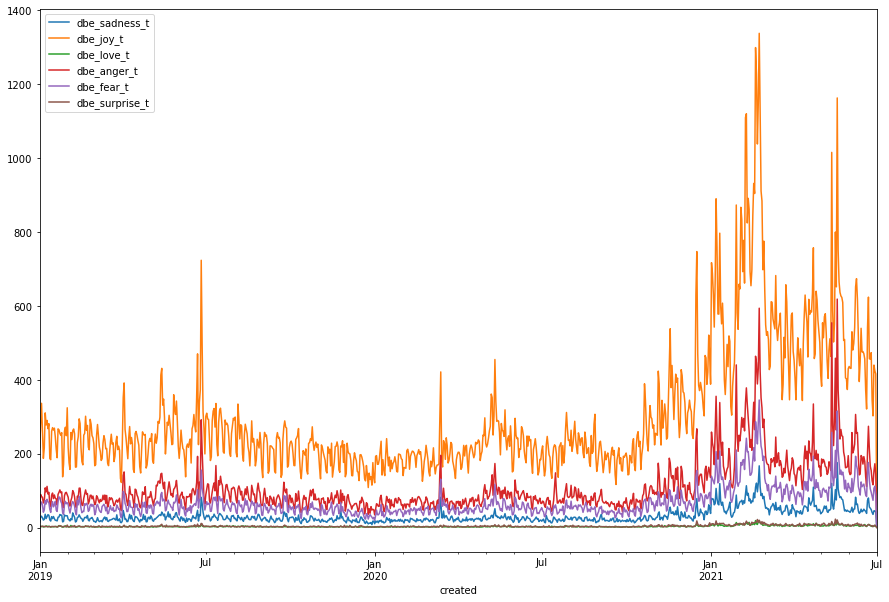

In [3]:
df[(df.origin!='main')&(df.dbe_joy!=0)][[emo+'_t' for emo in emotions]].resample('d').sum().plot.area(figsize=(15,10))
df[(df.origin=='main')&(df.dbe_joy!=0)][[emo+'_t' for emo in emotions]].resample('d').sum().plot.area(figsize=(15,10))

df[(df.origin!='main')&(df.dbe_joy!=0)][[emo+'_t' for emo in emotions]].resample('d').sum().plot(figsize=(15,10))
df[(df.origin=='main')&(df.dbe_joy!=0)][[emo+'_t' for emo in emotions]].resample('d').sum().plot(figsize=(15,10))